# COGS 108 - Final Project 

# Overview

In this project, I seek to see if different inspectors are more likely to give higher reviews to different restaurant types. The motivation for this project comes from the fact that humans prefer different restaurant types over others. I seek to see if this bias carries over to health inspectors or if they try to remain as objective as possible.

I sought to first create a dataset that stored each inspector and the total averages and average of each food type. After doing so, I visualized the results in different ways to show all of the different perspectives of this data.

From the results of these visualizations, it is clear to see that, although the averages of each inspector remains relatively constant (with little variability that can be accounted for by chance), each inspector is shown to give different restaurants different inspection scores with a higher variability.

# Name & GitHub

- Name: Lazar Katanic
- GitHub Username: lkatanic

# Research Question

In this Project, I question the ethics of health inspections. Using restaurant and inspection data from North Carolina, I will be looking to see if different health inspectors are more likely to give positive or negative reviews. Furthermore, I plan on expanding and seeing if different health inspectors are more likely to give a positive review to different restaurant types (such as a pizza parlor versus a burger shop).

## Background and Prior Work

References:
- 1 ) https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2953142

In a study conducted by Harvard Business School finds that health inspectors' scores decrease as the day goes on. For example, the health inspectors are more likely to give a positive review in the morning than later in the day. Using data from thousands of food safety inspection records for restaurants and food-service establishments found that the average number of violation inspectors are likely to cite falls by 3.2 percent with each new inspection throughout the day.

This is beneficial in mentioning in my study because it shows that health inspectors are indeed biased by their own beliefs and may not be completely objective with each violation. The results show that, were “daily schedule effects” non-existent, inspectors might cite 9.9 percent more health violations, resulting in 19 million fewer foodborne illnesses per year.

- 2 ) http://www.lse.ac.uk/business-and-consultancy/consulting/assets/documents/consistency-and-cognitive-influences-on-the-expert-judgement-of-environmental-health-officers.pdf

A study conducted by the London School of Economics and Political Science found that there does not exist an "anchoring bias" on health inspectors. This means that health inspectors do not weigh themselves disproportionately on information given at the beginning of an inspection.

This goes to show that health inspectors do try to remain consistent and objective throughout their inspections, which may go to show that my study may not yield differences between the types of restaurants reviewed.

# Hypothesis


I hypothesize that not only will there be a difference in the results of different health inspectors, but also they may be biased towards different types of restaurants. I believe this because health inspectors are people just like us- and personally, I have a bias towards foods that I enjoy so I think it could be possible that some inspectors may behave similarly.

# Dataset(s)

**Dataset Name:** inspections.csv (given by Prof. Ellis)

**Link to the dataset:** http://data-wake.opendata.arcgis.com/datasets/food-inspection-violations/data?orderBy=INSPECTDATE&selectedAttribute=OBSERVATIONTYPE

This data was provided through the COGS 108 class and it includes data from health inspections across Wake County, North Carolina.

In the data used, there were 31 different health inspectors and 21 different restaurant types. Not all inspectors reviewed each restaurant type, however with over 13 thousand inspections across Wake County, North Carolina from September 19th, 2012 to the present, I believe that there is enough data to justify this analysis.

I believe this data to be faithful as it is given by the government of Wake County.

**Dataset Name:** yelp.csv (given by Prof. Ellis)

**Link to the dataset:** http://data-wake.opendata.arcgis.com/datasets/food-inspection-violations/data?orderBy=INSPECTDATE&selectedAttribute=OBSERVATIONTYPE

This data was provided through the COGS 108 class and it includes data from Yelp reviews of the restaurants across Wake County, North Carolina.

How I am using this data is only looking at the type of restaurant each is. Then I am combining it with the previous dataset in order to distinguish which restaurant sells what kind of food. Then I will be able to analyze and see how each inspector reviews each different kind of food.

I believe this data to be faithful as it is given by the people of Wake County who have reviewed this restaurants.

# Setup

In this project, I credit the packages pandas and numpy for organizing my data. I also credit the packages seaborn and matplot lib for plotting and visualizing the data organized. After imported said packages, I read in the datasets into pandas dataframes.

In [117]:
# SETUP / importing packages
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (17, 5)
plt.rcParams.update({'font.size': 16})
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns

In [118]:
# read yelp.csv
yelp_df = pd.read_csv('data/yelp.csv')

# read inspections.csv
inspections_df = pd.read_csv('data/inspections.csv')

# Data Cleaning

### (Text is bolded to easily distinguish from code cells)
### To convert my data into something that is usable, I first dropped all unnecessary columns from my dataset. Additionally, I dropped all personal data. That being said, I kept the phone numbers because I used the phone numbers to link the yelp and inspections datasets.

In [119]:
# drop columns that are unneccessary and/or contain personal data according to the Safe Harbor Method
yelp_df = yelp_df.drop(columns=['is_closed', 'rating', 'review_count', 'latitude', 'longitude', 'price', 'id', 'name', 'address1', 'zip_code'])
inspections_df = inspections_df.drop(columns=['date', 'name', 'address1', 'address2', 'days_from_open_date',
                                              'x', 'y', 'geocodestatus', 'zip', 'description','inspection_num',
                                              'previous_inspection_date', 'restaurantopendate', 'facilitytype', 'type',
                                              'days_since_previous_inspection', 'num_critical',
                                              'num_non_critical', 'num_critical_previous',
                                              'num_non_critical_previous', 'num_critical_mean_previous',
                                              'num_non_critical_mean_previous', 'avg_neighbor_num_critical',
                                              'avg_neighbor_num_non_critical', 'top_match', 'second_match',
                                              'critical', 'previous_inspection_by_same_inspector', 'inspector_id',
                                              'postalcode', 'city', 'state'])

### I created a new dataset to store the combined datasets. Then, using a function that I created, I was able to standardize all of the phone numbers so that they can be combined. It is necessary that I combine these datasets in order to understand which kind of restaurants each place is (e.g. if a place is a pizza parlour or a burger joint). After combining the datasets, I removed the phone numbers column in order to delete personal data.

In [120]:
# master dataframe
master_df = inspections_df.copy(deep=True)
master_df = master_df.rename({'phonenumber' : 'phone'}, axis='columns')

# standardize phone func
def standardize_phone(string):
    try:
        if string[0] == '(':
            return '1' + string[1:4] + string[6:9] + string[10:14]     
    # if the string is not in the correct format, it is a null value
    except:
        return np.nan

# standardize the phone numbers so that they have the same format as the yelp dataset
master_df['phone'] = master_df['phone'].apply(standardize_phone)

# merge master dataframe with yelp dataframe
master_df = pd.merge(master_df, yelp_df, on='phone')

# drop phone numbers for ethics
master_df = master_df.drop(columns=['phone'])

### Now all of the data from inspections and yelp are in one dataset. I want to compare the results of different inspectors but I do not want to have the inspectors names, so I replace all names with indices.

In [121]:
# remove inspector names from master_df, replace with id number that corresponds to index in all_inspectors array
all_inspectors = [np.nan]
for inspector in master_df.values:
    if inspector[1] not in all_inspectors:
        all_inspectors.append(inspector[1])

# each inspector is replaced with the inspector index
inspector_index = 0
for inspector in all_inspectors:
    master_df.loc[master_df['inspectedby'] == inspector, 'inspectedby'] = inspector_index
    inspector_index += 1

### My data is now ready for analysis.

# Data Analysis & Results

### The following two cells are pretty complex, but it is the bulk of my data organization. Essentially, first, the averages of each of each inspector's scores are calculated. Then, the averages of each inspector's score for each type of restaurant is calculated. These values are all stored into the inspectors dataframe, which holds each inspector number, and the averages for each.

In [122]:
type_range = range(2, len(master_df.iloc[0]))

# this function will return the indicies of the columns that a master_df row is true for the types of resturants
def find_types(score):
    types = []
    for i in type_range:
        if score[i] == True:
            types.append(i)
    return types

In [123]:
# SETUP
avg_scores = []
score_num = []
for i in range(len(all_inspectors)):
    avg_scores.append(0)
    score_num.append(0)
    
# total average calculation
for score in master_df.values:
    if type(score[1]) is not int:
        continue
        
    if score_num[score[1]] is 0:
        avg_scores[score[1]] = score[2]
    else:
        avg_scores[score[1]] += score[2]
        
    score_num[score[1]] += 1
    
for i in range(len(all_inspectors)):
    if score_num[i] != 0:
        avg_scores[i] = avg_scores[i] / score_num[i]

# create inspectors dataframe to hold values for each inspector
inspectors_df = pd.DataFrame(data={'Inspector Number':range(len(avg_scores)),'Average Score':avg_scores})
types = ['hotdogs', 'sandwiches', 'pizza', 'tradamerican', 'burgers', 'mexican', 'grocery', 'breakfast_brunch', 'coffee', 'chinese', 'italian', 'newamerican', 'chicken_wings', 'delis', 'bars', 'salad', 'seafood', 'bbq', 'bakeries', 'sushi']
for i in types:
    inspectors_df[i] = 0.0

# type average calculation
# holds # of each type of each inspector
inspector_score_num = [0.0] * 31 * 21
for score in master_df.values:
    # score[1] is inspector number
    # score[2] is the score of inspection
    
    # if the score value is not an integer, it is invalid
    if type(score[1]) is not int:
        continue

    for i in find_types(score):
        # do not add null scores
        if score[2] is 0:
            continue
                
        if inspectors_df.at[score[1] - 1, types[i-3]] is 0:
            inspectors_df.at[score[1] - 1, types[i-3]] = score[2]
        else:
            inspectors_df.at[score[1] - 1, types[i-3]] += score[2]
        inspector_score_num[(20 * (score[1] - 1)) + (i-3)] += 1.0

# calculate averages
for i in range(31):
    for j in range(20):
        if inspector_score_num[20 * i + j] != 0.0:
            inspectors_df.at[i, types[j]] /= inspector_score_num[20 * i + j]
            
inspectors_df = inspectors_df.loc[inspectors_df['Inspector Number'] != 0]
inspectors_df = inspectors_df.sort_values(by=['Average Score'])
inspectors_df = inspectors_df.reset_index()
inspectors_df['index'] = range(31)

Maximum Average Inpsector Score: 97.75562218890555
Minimum Average Inpsector Score: 92.52412280701755


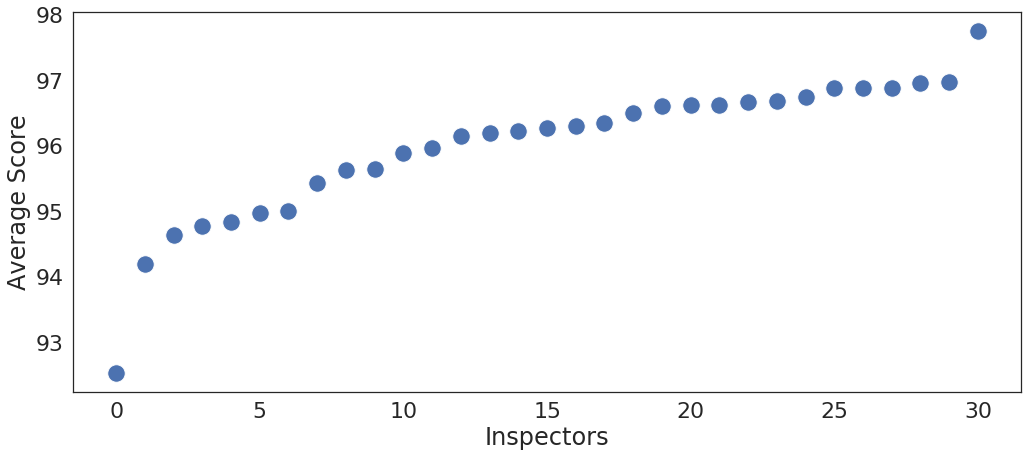

In [124]:
sns.set(style="white", font_scale=2)
plt.rcParams['figure.figsize'] = (17, 7)

sns.scatterplot(x='index', y='Average Score', data=inspectors_df, s=300)
plt.xlabel('Inspectors')

print("Maximum Average Inpsector Score: ", end='')
print(inspectors_df['Average Score'].max())
print("Minimum Average Inpsector Score: ", end='')
print(inspectors_df['Average Score'].min())

### The above code cell provides the minimum average and maximum average inspector scores, along with a scatter plot to show each. This shows that there exists one outlier on each end that skews the data further apart. Nonetheless, for the most part, there is only a couple percentage variability across inspectors.

Total Average: 95.99259976356977


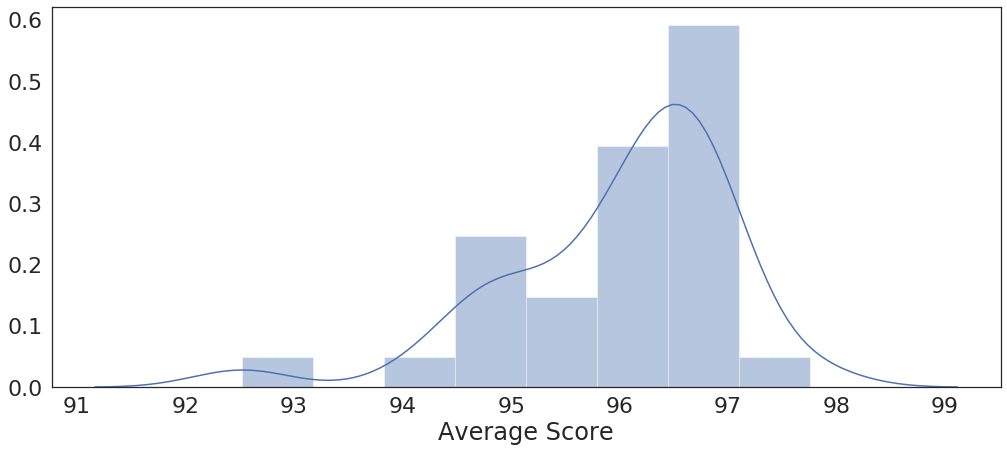

In [125]:
sns.distplot(inspectors_df['Average Score'], hist=True)
print("Total Average: ", end='')
print(inspectors_df['Average Score'].mean())

### This plot shows that the data is skewed to the left and health inspectors are more likely to give higher scores, while the average score is just below a 96%.

Text(0, 0.5, 'Average Score Per Type')

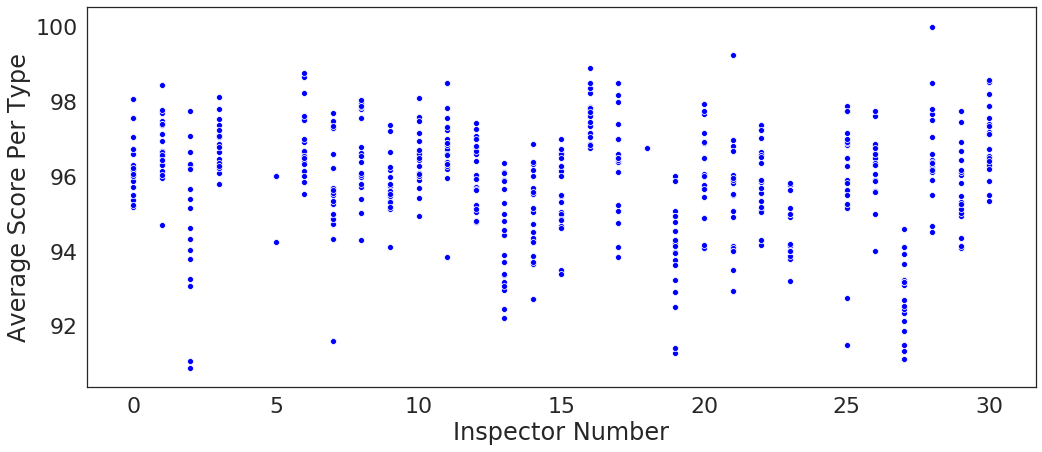

In [126]:
sns.set(style="white", font_scale=2)
plt.rcParams['figure.figsize'] = (17, 7)

inspect_data = inspectors_df.copy(deep=True)
inspect_data = inspect_data.T
inspect_data = inspect_data.drop(['index', 'Inspector Number', 'Average Score'])
inspect_data.replace(0, np.nan, inplace=True)

for inspector in inspect_data.values:
    sns.scatterplot(data=inspector, color='blue')

plt.xlabel("Inspector Number")
plt.ylabel("Average Score Per Type")

### This plot shows the different scores per type of resturant. While each x-value corresponds to an inspector, each y-value corresponds to the average of a specific food type. This goes to show that there is a variability between different types of restaurants and the inspectors reviews.

Text(0, 0.5, 'Score')

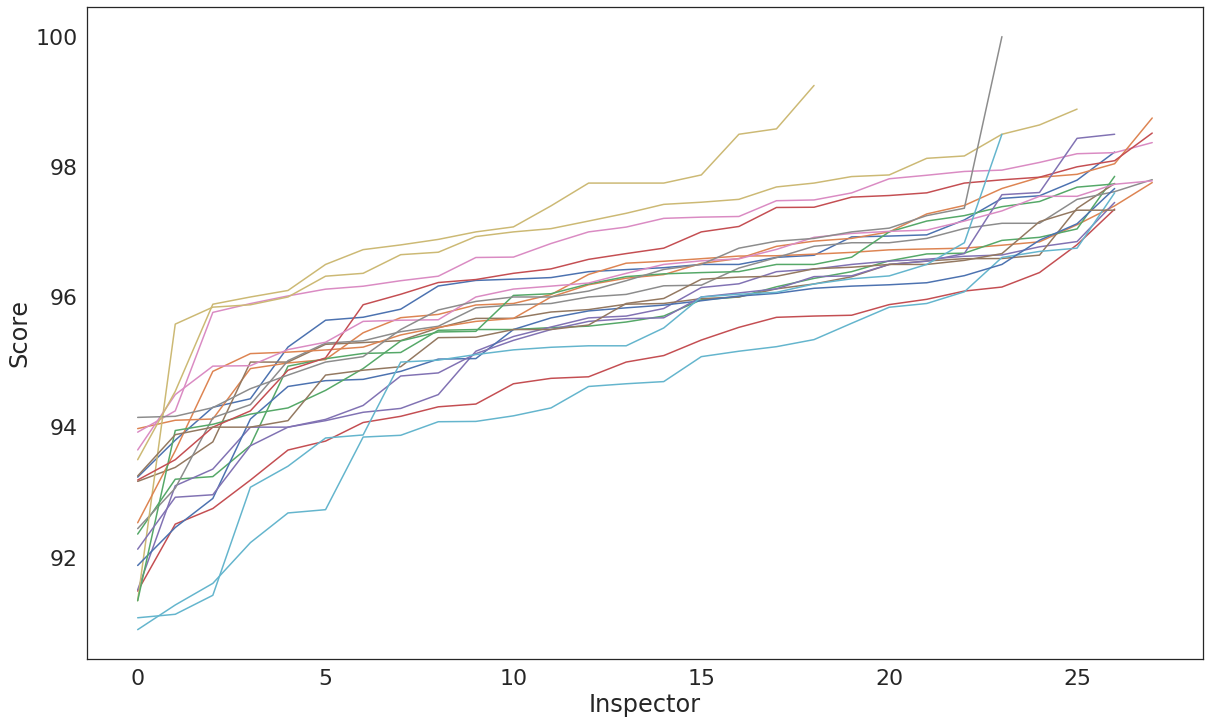

In [127]:
inspect_data = inspect_data.T
sns.set(style="white", font_scale=2)
fig = plt.figure(figsize=(20,12))

for food_type in types:
    sns.lineplot(data=inspect_data[food_type].sort_values().reset_index()[food_type], dashes=False)
plt.xlabel("Inspector")
plt.ylabel("Score")

### This final plot shows the different reviews for particular restaurants. The data here shows that a particular type of restaurant is more liekly to recieve a higher review if it is inspected by a different inspector. This shows clearly that all inspectors are not objective about different food types.

# Ethics & Privacy

The Health Inspection data that is collected from Wake County, North Caroline is publically listed online who are concerned about ratings of different resturants and for studies like these. 

Similarly, the data from Yelp was also created by the developers of Yelp to inform the public. Over the course of the project, I plan on adhering to the Yelp Dataset Terms of Use (https://s3-media3.fl.yelpcdn.com/assets/srv0/engineering_pages/bea5c1e92bf3/assets/vendor/yelp-dataset-agreement.pdf ), which states I must not modify any of its data nor use it to promote my own business among other things. The intentions of this project do not go against any of the listed guidelines. Furthermore, I am only using this dataset to find the types of foods that each restaurant sells, and no other information.

I do not believe that this project will be going against the privacy of anyone since I plan on not listing any business by name, nor will I include their locations. All the data I will be accessing is public information. All private information is deleted.

There is the bias of my dataset in that it only looks at Wake County, which is sufficient for adjusting health inspections in that county and may extend onto all of North Carolina, but it may be a stretch to use the information generated in this study outside of that state.

# Conclusion & Discussion

The data above shows that some restaurant types are more likely to get higher health inspection scores than others depending on the reviewer. When working with the data, at first I thought that a possible confound could be that different types of restaurants may be more likely to have higher reviews than the other. But as shown in the last graph, it seems that, for the most part, all types of restaurants have variability between reviewers.

That being said, at the end of the day there is really not all that much variability between scores and all scores are within an A range. There are also many limitations within my specific analysis that must be addressed if we want to accept my hypothesis. For example, there may be other confounds that cause this and we do not know any personal information about the inspectors themselves. There just is not enough information in the data used.

With this in mind, I believe it is inconclusive whether or not inspectors bring in personal bias towards different restaurant types; In other words, I fail to reject the null hypothesis. I believe further work must be done to better understand the relationship.